In [ ]:
# Collecte des données – OpenAQ API
Ce notebook permet de réaliser une première collecte de données de qualité de l'air


In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [216]:
import importlib
import clean
importlib.reload(clean)

from clean import (
    clean_indices_atmo,
    clean_mesures,  # ça doit fonctionner après reload
    clean_emissions_par_secteur,
    clean_indices_pollens,
    clean_episodes_3jours,
    clean_meteo
)


In [205]:
import pandas as pd

# Chemin de base vers ton dossier
base = "/Users/yasmine/Documents/projet-data-QA-1/data/raw/atmo/"


# Chargement manuel des fichiers un par un
df_mesures = pd.read_csv(base + "mesures_horaires_atmosud2.csv", sep=";", encoding="utf-8")
df_atmo = pd.read_csv(base + "indices_atmo.csv", sep=",", encoding="utf-8")
df_emissions = pd.read_csv(base + "emissions_par_secteur.csv", sep=",", encoding="utf-8")
df_episodes = pd.read_csv(base + "episodes_3jours.csv", sep=",", encoding="utf-8")
df_pollens = pd.read_csv(base + "indices_pollens.csv", sep=",", encoding="utf-8")
df_meteo = pd.read_csv("/Users/yasmine/Documents/projet-data-QA-1/data/raw/meteo/meteo.csv", sep =";")


# Aperçu rapide
print("✅ Données chargées")
display(df_meteo.head())
display(df_mesures.head())
display(df_atmo.head())
display(df_emissions.head())
display(df_episodes.head())
display(df_pollens.head())


✅ Données chargées


,time,temperature_2m,relative_humidity_2m,precipitation,windspeed_10m,ville
0,2025-06-01T00:00,18.90,96,0.00,5.00,Marseille
1,2025-06-01T01:00,18.40,98,0.00,2.90,Marseille
2,2025-06-01T02:00,18.20,100,0.00,3.60,Marseille
3,2025-06-01T03:00,18.40,99,0.00,1.10,Marseille
4,2025-06-01T04:00,18.60,98,0.00,0.00,Marseille


,id_site,num_stat_euro,nom_site,adrs,nom_compose,dh,compose_iso,lon,lat,concentration,code,couleur_hexa,qualificatif
0,1,FR24030,Nice - Station Aéroport Nice,Aeroport de Nice,SO2,2025-07-28T14:00:00,1,7.20,43.66,1.00,1.00,#50F0E6,Bon
1,1,FR24030,Nice - Station Aéroport Nice,Aeroport de Nice,NO2,2025-07-28T14:00:00,3,7.20,43.66,6.20,1.00,#50F0E6,Bon
2,1,FR24030,Nice - Station Aéroport Nice,Aeroport de Nice,O3,2025-07-28T14:00:00,8,7.20,43.66,94.60,2.00,#50CCAA,Moyen
3,1,FR24030,Nice - Station Aéroport Nice,Aeroport de Nice,PM10,2025-07-28T14:00:00,24,7.20,43.66,18.00,1.00,#50F0E6,Bon
4,1,FR24030,Nice - Station Aéroport Nice,Aeroport de Nice,PM2.5,2025-07-28T14:00:00,39,7.20,43.66,4.00,1.00,#50F0E6,Bon


,aasqa,date_maj,code_no2,code_o3,code_pm10,code_pm25,code_qual,code_so2,code_zone,coul_qual,date_dif,date_ech,epsg_reg,lib_qual,lib_zone,source,type_zone,x_reg,x_wgs84,y_reg,y_wgs84,gml_id2
0,93,2025/06/27 14:02:46.887+02,1,2,1,2.00,2,1,4070,#50CCAA,2024/12/31,2024-12-30,2154,Moyen,Digne-les-Bains,AtmoSud,commune,957581.02,6.22,6339167.40,44.10,NaN
1,93,2025/06/27 14:02:46.887+02,2,2,2,2.00,2,1,5061,#50CCAA,2024/12/31,2024-12-30,2154,Moyen,Gap,AtmoSud,commune,944035.07,6.08,6391384.20,44.58,NaN
2,93,2025/06/27 14:02:46.887+02,2,2,2,2.00,2,1,6088,#50CCAA,2024/12/31,2024-12-30,2154,Moyen,Nice,AtmoSud,commune,1042014.82,7.24,6298427.10,43.70,NaN
3,93,2025/06/27 14:02:46.887+02,2,2,2,3.00,3,1,13001,#F0E641,2024/12/31,2024-12-30,2154,Dégradé,Aix-en-Provence,AtmoSud,commune,896334.74,5.42,6273570.90,43.54,NaN
4,93,2025/06/27 14:02:46.887+02,1,1,2,4.00,4,1,13004,#FF5050,2024/12/31,2024-12-30,2154,Mauvais,Arles,AtmoSud,commune,839237.32,4.72,6273262.85,43.54,NaN


,aasqa,date_maj,superficie,population,pm25,pm10,nox,ges,code_pcaet,code,name
0,2,2025/01/01 00:14:02.778+01,1128.00,386875,208.93,372.25,3137.46,1446613.84,219,2,Martinique
1,2,2025/01/01 00:14:02.778+01,1128.00,386875,50.41,52.87,47.33,36980.74,34,2,Martinique
2,2,2025/01/01 00:14:02.778+01,1128.00,386875,16.98,40.34,158.07,97602.48,5,2,Martinique
3,2,2025/01/01 00:14:02.778+01,1128.00,386875,158.89,250.61,2145.37,685960.24,6,2,Martinique
4,2,2025/01/01 00:14:02.778+01,1128.00,386875,57.98,63.14,980.40,65482.52,7,2,Martinique


,aasqa,date_maj,etat,lib_zone,lib_pol,date_ech,date_dif,code_zone,code_pol
0,93,2025/06/27 14:32:05.802+02,PAS DE DEPASSEMENT,ALPES-DE-HAUTE-PROVENCE,Particules PM10,2025-06-26,2025/06/27,4,5
1,93,2025/06/27 14:32:05.802+02,PAS DE DEPASSEMENT,ALPES-DE-HAUTE-PROVENCE,Ozone,2025-06-26,2025/06/27,4,7
2,93,2025/06/27 14:32:05.802+02,PAS DE DEPASSEMENT,ALPES-DE-HAUTE-PROVENCE,Particules PM10,2025-06-27,2025/06/27,4,5
3,93,2025/06/27 14:32:05.802+02,PAS DE DEPASSEMENT,ALPES-DE-HAUTE-PROVENCE,Ozone,2025-06-27,2025/06/27,4,7
4,93,2025/06/27 14:32:05.802+02,PAS DE DEPASSEMENT,ALPES-DE-HAUTE-PROVENCE,Particules PM10,2025-06-28,2025/06/27,4,5


,aasqa,date_maj,alerte,code_ambr,code_arm,code_aul,code_boul,code_gram,code_oliv,code_zone,conc_ambr,conc_arm,conc_aul,conc_boul,conc_gram,conc_oliv,date_dif,date_ech,lib_qual,lib_zone,type_zone,pollen_resp,source,code_qual,name
0,93,2025/06/27 14:09:03.370+02,1,1,1,1,1,4,1,5061,0,0,0,0.20,85.40,0.20,2025/06/27,2025-06-27,Élevé,Gap,commune,GRAMINEE,AtmoSud,4,NaN
1,93,2025/06/27 14:09:03.370+02,1,1,1,1,1,4,1,4070,0,0,0,0.10,72.50,0.00,2025/06/27,2025-06-27,Élevé,Digne-les-Bains,commune,GRAMINEE,AtmoSud,4,NaN
2,93,2025/06/27 14:09:03.370+02,1,1,1,1,1,4,1,84007,0,0,0,0.00,78.20,0.00,2025/06/27,2025-06-27,Élevé,Avignon,commune,GRAMINEE,AtmoSud,4,NaN
3,93,2025/06/27 14:09:03.370+02,1,1,1,1,1,4,1,6088,0,0,0,0.40,64.40,0.90,2025/06/27,2025-06-27,Élevé,Nice,commune,GRAMINEE,AtmoSud,4,NaN
4,93,2025/06/27 14:09:03.370+02,1,1,1,1,1,4,1,13004,0,0,0,0.00,81.50,0.00,2025/06/27,2025-06-27,Élevé,Arles,commune,GRAMINEE,AtmoSud,4,NaN


In [217]:
df_mesures_clean = clean_mesures(df_mesures)
df_atmo_clean = clean_indices_atmo(df_atmo)
df_emissions_clean = clean_emissions_par_secteur(df_emissions)
df_episodes_clean = clean_episodes_3jours(df_episodes)
df_meteo_clean = clean_meteo(df_meteo)
df_pollens_clean = clean_indices_pollens(df_pollens)

/Users/yasmine/Documents/projet-data-QA-1/scripts/clean.py:60: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  # Forcer conversion date_maj avec vérification


In [196]:
print(df_pollens.columns.tolist())



['aasqa', 'date_maj', 'alerte', 'code_ambr', 'code_arm', 'code_aul', 'code_boul', 'code_gram', 'code_oliv', 'code_zone', 'conc_ambr', 'conc_arm', 'conc_aul', 'conc_boul', 'conc_gram', 'conc_oliv', 'date_dif', 'date_ech', 'lib_qual', 'lib_zone', 'type_zone', 'pollen_resp', 'source', 'code_qual', 'name', 'code_insee']


In [220]:
import pandas as pd

df = pd.read_csv('/Users/yasmine/Documents/projet-data-QA-1/data/mesure_journaliere_clean.csv', sep=',')

# Supprimer les doublons sur la clé primaire
df_clean = df.drop_duplicates(subset=['id_station', 'datetime', 'polluant'])

# Réenregistrer
df_clean.to_csv('/Users/yasmine/Documents/projet-data-QA-1/data/mesure_journaliere_clean_dedup.csv', sep=',', index=False)


In [218]:
# Enregistrement
df_emissions_clean.to_csv("/Users/yasmine/Documents/projet-data-QA-1/data/emissions_par_secteur_clean.csv", index=False)
df_episodes_clean.to_csv("/Users/yasmine/Documents/projet-data-QA-1/data/episodes_jours_clean.csv", index=False)

In [174]:
df_atmo_clean.to_csv("/Users/yasmine/Documents/projet-data-QA-1/data/indices_atmo_clean.csv", index=False)
df_pollens_clean.to_csv("/Users/yasmine/Documents/projet-data-QA-1/data/indices_pollens_clean.csv", index=False)
df_emissions_clean.to_csv("/Users/yasmine/Documents/projet-data-QA-1/data/emissions_par_secteur_clean.csv", index=False)
df_episodes_clean.to_csv("/Users/yasmine/Documents/projet-data-QA-1/data/episodes_3jours_clean.csv", index=False)

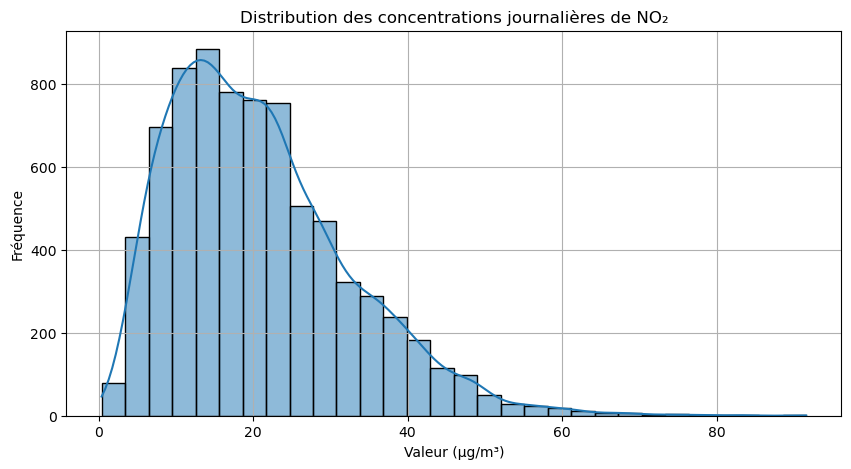

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Nettoyage si les valeurs sont au format texte avec virgule
df_mesures["valeur"] = df_mesures["valeur"].str.replace(",", ".").astype(float)

# Filtrer pour le dioxyde d’azote (NO₂)
df_no2 = df_mesures[df_mesures["label_polluant"].str.contains("dioxyde.*azote", case=False, na=False)]

# Affichage de la distribution
plt.figure(figsize=(10, 5))
sns.histplot(df_no2["valeur"], bins=30, kde=True)
plt.title("Distribution des concentrations journalières de NO₂")
plt.xlabel("Valeur (µg/m³)")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()


/var/folders/lc/7s90ff5s7gd707d91cwpmklh0000gp/T/ipykernel_85515/636099722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no2["date_debut"] = pd.to_datetime(df_no2["date_debut"])


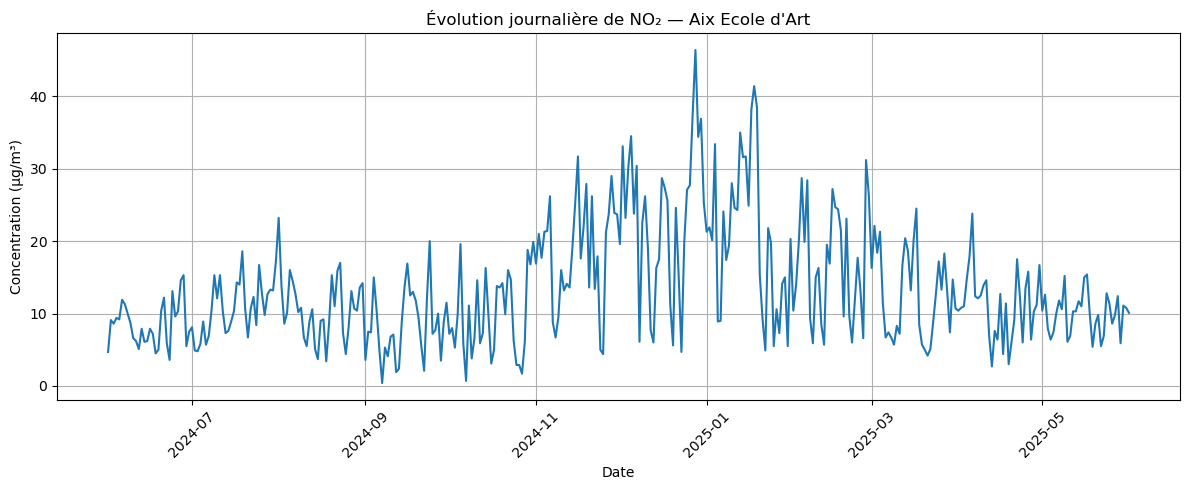

In [36]:
# S’assurer que la date est bien reconnue
df_no2["date_debut"] = pd.to_datetime(df_no2["date_debut"])

# Choisir une station (ex : Marseille, Aix, etc.)
station = "Aix Ecole d'Art"  # change le nom selon tes données

df_station = df_no2[df_no2["nom_station"] == station]

# Tracer l'évolution dans le temps
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_station, x="date_debut", y="valeur")
plt.title(f"Évolution journalière de NO₂ — {station}")
plt.xlabel("Date")
plt.ylabel("Concentration (µg/m³)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


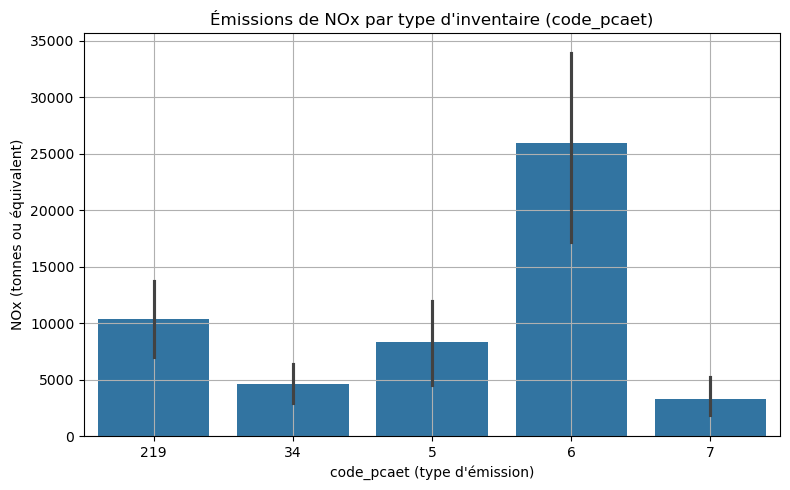

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exemple sur df_emissions_pcaet ou ton DataFrame actuel
df = df_emissions  # adapte au nom réel si différent

# Conversion des colonnes si nécessaire
df["nox"] = df["nox"].astype(float)
df["code_pcaet"] = df["code_pcaet"].astype(str)

# Tracer les NOx par type de code_pcaet
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="code_pcaet", y="nox")
plt.title("Émissions de NOx par type d'inventaire (code_pcaet)")
plt.xlabel("code_pcaet (type d'émission)")
plt.ylabel("NOx (tonnes ou équivalent)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [52]:
import pandas as pd
import psycopg2
from sqlalchemy import create_engine

# Paramètres de connexion PostgreSQL
user = 'yasminedri'
password = 'qualair'
host = 'localhost'   # ou l'adresse Docker si distante
port = '5432'
database = 'qualair_db'

# Créer l'engine SQLAlchemy pour simplifier la connexion
engine = create_engine(f'postgresql://{user}:{password}@{host}:{port}/{database}')

# Exemple : charger la table mesures_polluants
df = pd.read_sql('SELECT * FROM mesures_polluants', con=engine)

print(df.head())


                 date_debut  valeur  unite      nom_station id_station  \
0 2024-06-01 00:00:00+00:00     4.7  µg-m3  Aix Ecole d'Art    FR03029   
1 2024-06-02 00:00:00+00:00     9.1  µg-m3  Aix Ecole d'Art    FR03029   
2 2024-06-03 00:00:00+00:00     8.6  µg-m3  Aix Ecole d'Art    FR03029   
3 2024-06-04 00:00:00+00:00     9.4  µg-m3  Aix Ecole d'Art    FR03029   
4 2024-06-05 00:00:00+00:00     9.2  µg-m3  Aix Ecole d'Art    FR03029   

          label_polluant  polluant_id  temporalite validation  
0  Dioxyde d'azote (gaz)            3  journaliere    validée  
1  Dioxyde d'azote (gaz)            3  journaliere    validée  
2  Dioxyde d'azote (gaz)            3  journaliere    validée  
3  Dioxyde d'azote (gaz)            3  journaliere    validée  
4  Dioxyde d'azote (gaz)            3  journaliere    validée  


In [74]:
import pandas as pd

# === Chemin complet du fichier brut ===
fichier_path = "/Users/yasmine/Documents/projet-data-QA-1/data/raw/atmo/mesures_horaires_atmosud2.csv"

# === Lecture avec encodage utf-8 et séparateur adapté ===
try:
    df_mesures = pd.read_csv(fichier_path, sep=";", encoding="utf-8")
except UnicodeDecodeError:
    # Si UTF-8 échoue, tenter latin1
    df_mesures = pd.read_csv(fichier_path, sep=";", encoding="utf-8")

# === Affichage des premières lignes ===
print(df_mesures.head())
print(df_mesures.columns)


   id_site num_stat_euro                      nom_site              adrs nom_compose                   dh  compose_iso  lon   lat  concentration  code couleur_hexa qualificatif
0        1       FR24030  Nice - Station Aéroport Nice  Aeroport de Nice         SO2  2025-07-28T14:00:00            1 7.20 43.66           1.00  1.00      #50F0E6          Bon
1        1       FR24030  Nice - Station Aéroport Nice  Aeroport de Nice         NO2  2025-07-28T14:00:00            3 7.20 43.66           6.20  1.00      #50F0E6          Bon
2        1       FR24030  Nice - Station Aéroport Nice  Aeroport de Nice          O3  2025-07-28T14:00:00            8 7.20 43.66          94.60  2.00      #50CCAA        Moyen
3        1       FR24030  Nice - Station Aéroport Nice  Aeroport de Nice        PM10  2025-07-28T14:00:00           24 7.20 43.66          18.00  1.00      #50F0E6          Bon
4        1       FR24030  Nice - Station Aéroport Nice  Aeroport de Nice       PM2.5  2025-07-28T14:00:00          

In [75]:
import pandas as pd

# === Options d'affichage pour tableau lisible ===
pd.set_option("display.max_columns", None)       # Affiche toutes les colonnes
pd.set_option("display.max_rows", 50)            # Nombre max de lignes affichées
pd.set_option("display.expand_frame_repr", False)  # Évite de couper l'affichage
pd.set_option("display.float_format", '{:.2f}'.format)  # Format des nombres flottants

# === Affichage du DataFrame ===
display(df_mesures.head(20))  # Affiche les 20 premières lignes


,id_site,num_stat_euro,nom_site,adrs,nom_compose,dh,compose_iso,lon,lat,concentration,code,couleur_hexa,qualificatif
0,1,FR24030,Nice - Station Aéroport Nice,Aeroport de Nice,SO2,2025-07-28T14:00:00,1,7.20,43.66,1.00,1.00,#50F0E6,Bon
1,1,FR24030,Nice - Station Aéroport Nice,Aeroport de Nice,NO2,2025-07-28T14:00:00,3,7.20,43.66,6.20,1.00,#50F0E6,Bon
2,1,FR24030,Nice - Station Aéroport Nice,Aeroport de Nice,O3,2025-07-28T14:00:00,8,7.20,43.66,94.60,2.00,#50CCAA,Moyen
3,1,FR24030,Nice - Station Aéroport Nice,Aeroport de Nice,PM10,2025-07-28T14:00:00,24,7.20,43.66,18.00,1.00,#50F0E6,Bon
4,1,FR24030,Nice - Station Aéroport Nice,Aeroport de Nice,PM2.5,2025-07-28T14:00:00,39,7.20,43.66,4.00,1.00,#50F0E6,Bon
5,2,FR03029,Aix Ecole d'Art,Ecole des Beaux Arts,SO2,2025-07-28T14:00:00,1,5.44,43.53,1.00,1.00,#50F0E6,Bon
6,2,FR03029,Aix Ecole d'Art,Ecole des Beaux Arts,NO2,2025-07-28T14:00:00,3,5.44,43.53,3.50,1.00,#50F0E6,Bon
7,2,FR03029,Aix Ecole d'Art,Ecole des Beaux Arts,O3,2025-07-28T14:00:00,8,5.44,43.53,84.20,2.00,#50CCAA,Moyen
8,2,FR03029,Aix Ecole d'Art,Ecole des Beaux Arts,PM10,2025-07-28T14:00:00,24,5.44,43.53,19.70,1.00,#50F0E6,Bon
9,2,FR03029,Aix Ecole d'Art,Ecole des Beaux Arts,PM2.5,2025-07-28T14:00:00,39,5.44,43.53,5.10,1.00,#50F0E6,Bon


In [82]:
nb_null_adrs = df_mesures["adrs"].isna().sum()
print(f"❗ Lignes sans adresse : {nb_null_adrs}")


❗ Lignes sans adresse : 3417


In [77]:
import pandas as pd

# === Chemin vers le fichier météo ===
fichier_path = "/Users/yasmine/Documents/projet-data-QA-1/data/meteo/meteo_avignon.csv"

# === Lecture robuste (utf-8 puis latin1 si besoin) ===
try:
    df_meteo = pd.read_csv(fichier_path, sep=";", encoding="utf-8")
except UnicodeDecodeError:
    df_meteo = pd.read_csv(fichier_path, sep=";", encoding="latin1")

# === Configuration affichage tableau VS Code ===
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 50)
pd.set_option("display.expand_frame_repr", False)
pd.set_option("display.float_format", '{:.2f}'.format)

# === Affiche les 20 premières lignes ===
display(df_meteo.head(20))


,time,temperature_2m,relative_humidity_2m,precipitation,windspeed_10m,ville
0,2025-06-01T00:00,19.50,87,0.00,5.50,Avignon
1,2025-06-01T01:00,19.20,89,0.00,4.50,Avignon
2,2025-06-01T02:00,18.20,94,0.00,6.00,Avignon
3,2025-06-01T03:00,17.80,96,0.00,4.60,Avignon
4,2025-06-01T04:00,17.50,96,0.00,1.90,Avignon
5,2025-06-01T05:00,16.90,99,0.00,2.20,Avignon
6,2025-06-01T06:00,16.40,100,0.00,1.30,Avignon
7,2025-06-01T07:00,16.40,100,0.00,0.80,Avignon
8,2025-06-01T08:00,17.10,96,0.00,1.80,Avignon
9,2025-06-01T09:00,19.30,87,0.00,3.90,Avignon


In [115]:
# pour ma base de donnée il faut une table villes
# Étape 1 : Extraire les colonnes utiles
df_ville = df_atmo_clean[['code_insee', 'nom_commune', 'lon', 'lat']].drop_duplicates()

# Étape 2 : Supprimer les lignes incomplètes
df_ville = df_ville.dropna(subset=['code_insee', 'nom_commune', 'lon', 'lat'])

# Étape 3 : Ajouter une colonne id_ville
df_ville = df_ville.reset_index(drop=True)
df_ville['id_ville'] = df_ville.index + 1

# Réorganiser les colonnes pour avoir id_ville en premier
df_ville = df_ville[['id_ville', 'code_insee', 'nom_commune', 'lon', 'lat']]

# Sauvegarder si besoin
df_ville.to_csv("/Users/yasmine/Documents/projet-data-QA-1/data/ville.csv", index=False)

In [153]:
import pandas as pd

# Charger ton fichier station
df_station = pd.read_csv("/Users/yasmine/Documents/projet-data-QA-1/data/station_clean.csv",sep=";")



In [191]:
df_meteo = pd.read_csv("/Users/yasmine/Documents/projet-data-QA-1/data/raw/meteo/meteo_arles.csv", sep=";")

In [222]:
import pandas as pd

# Charger le fichier
df = pd.read_csv("/Users/yasmine/Documents/projet-data-QA-1/data/raw/synthetique/trafic_routier_synthetique.csv", sep=";")

# Harmonisation des colonnes si besoin
rename_map = {
    'Ville': 'ville',
    'Date': 'date',
    'Heure': 'heure',
    'Trafic': 'trafic'
}
df = df.rename(columns={k: v for k, v in rename_map.items() if k in df.columns})

# Conversion des types
df['date'] = pd.to_datetime(df['date'], errors='coerce').dt.date
df['heure'] = pd.to_datetime(df['heure'], errors='coerce').dt.time
df['ville'] = df['ville'].astype(str)
df['trafic'] = pd.to_numeric(df['trafic'], errors='coerce')

# Suppression des lignes incomplètes et doublons
df = df.dropna(subset=['ville', 'date', 'heure']).drop_duplicates()

# Réorganisation des colonnes
df = df[['date', 'heure', 'ville', 'trafic']]

# Sauvegarde du fichier nettoyé
df.to_csv("/Users/yasmine/Documents/projet-data-QA-1/data/trafic_synthetique_clean.csv", sep=";", index=False)

print("Nettoyage terminé. Fichier sauvegardé : trafic_synthetique_clean.csv")


Nettoyage terminé. Fichier sauvegardé : trafic_synthetique_clean.csv


/var/folders/lc/7s90ff5s7gd707d91cwpmklh0000gp/T/ipykernel_85515/3231029398.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['heure'] = pd.to_datetime(df['heure'], errors='coerce').dt.time
